## Code to plot Supplementary Figure 2, panel c

In [1]:
import matplotlib.pyplot as plt
import polars as pl
from sklearn.metrics import roc_curve
import seaborn as sns
import numpy as np

In [ ]:
df_mod3 = pl.read_csv('./mod3_age_edu_mmse_MEG.csv')

In [4]:
df_mod3

factor,AME,SE,z,p,lower,upper
str,f64,f64,f64,f64,f64,f64
"""age""",0.009734,0.007184,1.354891,0.175452,-0.004347,0.023814
"""Edu_years""",0.019888,0.009069,2.193013,0.028306,0.002113,0.037663
"""meg_average_cluster_adj""",-0.121883,0.021611,-5.639934,1.7012e-8,-0.164239,-0.079527
"""MMSE""",-0.055038,0.014269,-3.857171,0.000115,-0.083004,-0.027071


In [5]:
df_mod3 = df_mod3.sort(pl.col('AME').abs(), descending=False)

In [6]:
factors=df_mod3['factor'].to_list()

In [ ]:
roc3 = pl.read_csv('./roc_data_mod3_MEG.csv')

In [9]:
mapping = {
    'age': 'Age',
    'Edu_years': 'Education',
     'MMSE': 'MMSE',
     'ratio_Hippocampus_TotalGrayVol': 'Hippocampal ratio',
     'meg_average_cluster_adj': 'MEG'
}

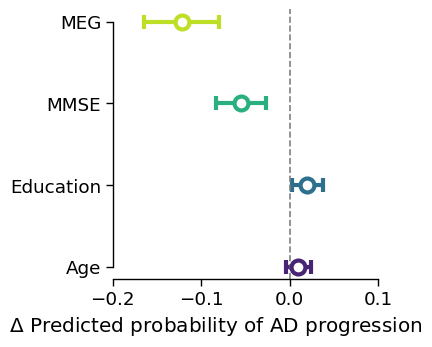

In [ ]:
# Adjust color range to match the number of factors (6 factors, 6 colors)
num_factors = len(df_mod3)  # Assuming df_mod5 has 6 rows, adjust as per the actual number of rows
colors = plt.cm.viridis(np.linspace(0.1, 0.9, num_factors))

sns.set_context('paper', font_scale=1.5)

### Panel A

# Create the subplot layout with mosaic (Remove Panel B - ROC Curves)
fig, ax = plt.subplots(1, 1, figsize=(4, 3.5))  # Adjusted size for a single panel

# Plot each factor with its respective color
for ii, (factor, ame, se, *_) in enumerate(df_mod3.rows()):
    ax.errorbar(
        x=ame, y=ii, xerr=se * 1.96, fmt='o', capsize=5, capthick=2.5,
        ms=10, linewidth=3, color=colors[ii], mfc='white', mew=3
    )

ax.axvline(0, linestyle='--', color='gray')

# Assuming factors is a list of all factor names in the correct order
factors = ['Age', 'Education', 'MMSE', 'MEG']

# Map factors using a mapping if necessary
mapped_factors = [mapping.get(f, f) for f in factors]

# Set the y-ticks with the custom order
ax.set_yticks(range(len(factors)), mapped_factors)

# Set x-ticks and labels with better scaling
ax.set_xlim(-0.2, 0.15)  # Extend the x-axis range to make space for data points
ax.set_xlabel(r'$\Delta$ Predicted probability of AD progression', loc='right')

# Remove the spines for cleaner look
sns.despine(trim=True, ax=ax)

# Save the figure
fig.savefig('suppl_fig2c.pdf', bbox_inches='tight')
fig.savefig('suppl_fig2c.png', dpi=300, bbox_inches='tight')